<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#队列概览" data-toc-modified-id="队列概览-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>队列概览</a></span></li><li><span><a href="#队列接口及其服务" data-toc-modified-id="队列接口及其服务-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>队列接口及其服务</a></span></li><li><span><a href="#队列的两个应用" data-toc-modified-id="队列的两个应用-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>队列的两个应用</a></span><ul class="toc-item"><li><span><a href="#模拟" data-toc-modified-id="模拟-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>模拟</a></span></li><li><span><a href="#轮询CPU调度" data-toc-modified-id="轮询CPU调度-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>轮询CPU调度</a></span></li></ul></li><li><span><a href="#队列的实现" data-toc-modified-id="队列的实现-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>队列的实现</a></span><ul class="toc-item"><li><span><a href="#队列链表实现" data-toc-modified-id="队列链表实现-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>队列链表实现</a></span></li><li><span><a href="#数组实现" data-toc-modified-id="数组实现-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>数组实现</a></span></li><li><span><a href="#两种实现的时间和空间复杂度分析" data-toc-modified-id="两种实现的时间和空间复杂度分析-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>两种实现的时间和空间复杂度分析</a></span></li></ul></li><li><span><a href="#案例学习：模拟超市排队结账" data-toc-modified-id="案例学习：模拟超市排队结账-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>案例学习：模拟超市排队结账</a></span></li><li><span><a href="#优先队列" data-toc-modified-id="优先队列-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>优先队列</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# 队列概览
先进先出（FIFO,first in first out）

和队列相关的集合叫做优先队列。具有较高优先级的项，会在那些具有较低优先级的项之前弹出，具有相同优先级则FIFO

比如说进程调度，先响应键盘输入和屏幕输出，给人感觉反应挺快。

# 队列接口及其服务
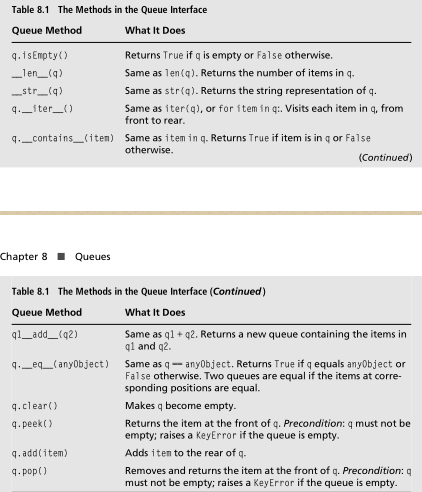

# 队列的两个应用
## 模拟
用于帮助超市经理决定每天不同时段在岗工作的收银员数目
## 轮询CPU调度
将新的进程添加到一个队列的队尾。每一个进程都依次弹出。

# 队列的实现
## 队列链表实现
add在尾部添加一个节点。pop在头部弹出一个节点。还包含了指向两端的外部指针头部front和尾部rear

In [ ]:
from node import Node
from abstractcollection import AbstractCollection

class LinkedQueue(AbstractCollection):
    """A link-based queue implementation."""

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it's present."""
        self._front = self._rear = None
        AbstractCollection.__init__(self, sourceCollection)

    # Accessor methods
    def __iter__(self):
        """Supports iteration over a view of self."""
        temp = []
        probe = self._front
        while probe != None:
            temp.append(probe.data)
            probe = probe.next
        return iter(temp)
    
    def peek(self):
        """
        Returns the item at the front of the queue.
        Precondition: the queue is not empty.
        Raises: KeyError if the stack is empty."""
        if self.isEmpty():
            raise KeyError("The queue is empty.")
        return self._front.data

    # Mutator methods
    def clear(self):
        """Makes self become empty."""
        self._front = None
        self._rear = None
        self._size = 0
        pass
    
    def add(self, item):
        """Adds item to the rear of the queue."""
        newNode = Node(item, None)
        if self.isEmpty():
            self._front = newNode
        else:
            self._rear.next = newNode
        self._rear = newNode
        self._size += 1

    def pop(self):
        """
        Removes and returns the item at the front of the queue.
        Precondition: the queue is not empty.
        Raises: KeyError if the queue is empty.
        Postcondition: the front item is removed from the queue."""
        if self.isEmpty():
            raise KeyError("The queue is empty.")
        oldItem = self._front.data
        self._front = self._front.next
        if self._front is None:
            self._rear = None
        self._size -= 1
        return oldItem

## 数组实现
可以采用一种**循环数组实现**，可以同时实现add和pop较好的运行时间。
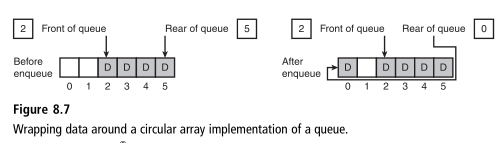

当计数等于数组大小的时候，就应该调整数组大小。

调整数组之后，让队列放在新队列最初的数组段，从front为0开始。考虑开始调整大小时候的两种情况：
1. front指针小于rear指针。并且将从位置0到size-1的项复制到新的数组中
2. rear指针小于front指针。在最初数组中从front到size-1循环遍历，将遍历结果的0到size-front的项复制到新的数组中。然后，在最初的数组中从0到rear循环遍历，并且将遍历结果size-front+1到size-1的项复制到新数组中。

## 两种实现的时间和空间复杂度分析
1. 链表实现，__str__, __add__（这个不确定，我觉得可能是O(1)）, __eq__方法的运行时间都是O(n)，所有其他的方法最大运行时间都是O(1)。总的空间需求为2n+3
2. 对于循环数组实现来说，除了__str__, __add__, __eq__之外的所有方法，其最大运行时间都是O(1)。当需要调整数组大小的时候，add和pop会增加到O(n)，但是平均运行时间还是保持为O(1)。

两种方法对内存的利用效率取决于装载因子。

# 案例学习：模拟超市排队结账

# 优先队列
优先队列是一种特殊的队列。相同优先级，按照FIFO顺序。除此之外，整数、字符串或识别比较运算符都可以在优先队列中排序。比如较小的整数是较高优先级。

当一个对象本身是不可比较的时候，可以使用另一个课比较对象的优先级来包装它。

In [ ]:
class Comparable(object):

    def __init__(self, data, priority = 1):
        self._data = data
        self._priority = priority

    def __str__(self):
        """Returns the string rep of the contained datum."""
        return str(self._data)

    def __eq__(self, other):
        """Returns True if the contained priorities are equal
        or False otherwise."""
        if self is other: return True
        if type(self) != type(other): return False
        return self._priority == other._priority

    def __lt__(self, other):
        """Returns True if self's priority < other's priority,
        or False otherwise."""
        return self._priority < other._priority

    def __le__(self, other):
        """Returns True if self's priority <= other's priority,
        or False otherwise."""
        return self._priority <= other._priority

    def getData(self):
        """Returns the contained datum."""
        return self._data 

    def getPriority(self):
        """Returns the contained priority."""
        return self._priority 

In [ ]:
queue.add(Comparable(a, 1))
queue.add(Comparable(b, 2))
queue.add(Comparable(c, 3))

这个构造方法继承前面LinkedQueue类中使用的单链表结构。只有add方法需要作出修改。

1. 如果队列为空，或者新的项大于等于队尾的项，就像之前一样添加该项。
2. 否则，从队头开始向前遍历各个节点，直到新项小于当前节点中的项。此时在当前节点之前插入一个新的节点包含该项。使用两个指针，probe用来指向新项之后的节点，trailer指向新项之前的节点。\n 如果probe指向第一个节点，将队列的front指针设置为新节点

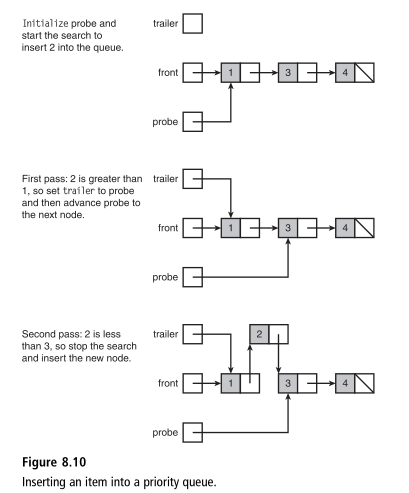

In [ ]:
def add(self, item):
        """Adds item to its proper place in the queue."""
        if self.isEmpty() or item >= self._rear.data:
            LinkedQueue.add(self, item)
        else:
            probe = self._front
            trailer = None
            while item >= probe.data:
                trailer = probe
                probe = probe.next
            newNode = Node(item, probe)
            if trailer is None:
                self._front = newNode
            else:
                trailer.next = newNode
            self._size += 

# Summary
1. 队列是一个线性的集合，它在队尾添加元素，从队头删除元素。FIFO
2. 队列上的其它元素包括：查看顶部的元素，确定元素编号，判断队列是否为空，返回字符串表示
3. 数组和单链表实现
4. 优先队列 = 优先级排序 + FIFO